In [1]:
import csv
import pandas as pd
import numpy as np
from google.cloud import bigquery
from google.oauth2 import service_account
from google.cloud.bigquery import magics
import matplotlib.pyplot as plt  
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import statsmodels.api as sm 
from sklearn.preprocessing import FunctionTransformer

In [2]:
import os
BIGQUERY_PROJECT = 'cloud-test-ironhacks'
BIGQUERY_KEYPATH = 'cloud-test-ironhacks-c1010c49a602.json'

os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = BIGQUERY_KEYPATH
bigquery_client = bigquery.Client(project=BIGQUERY_PROJECT)

In [3]:
query = """
SELECT * FROM `cloud-test-ironhacks.dwd_data.suppression_remove`

"""

query_job = bigquery_client.query(query)
data = query_job.to_dataframe()
data = data.dropna()
data

,uu_id,timeperiod,week_number,countyfips,tract,tract_name,total_claims,edu_8th_or_less,edu_grades_9_11,edu_hs_grad_equiv,...,gender_female,gender_male,gender_na,race_amerindian,race_asian,race_black,race_noanswer,race_hawaiiannative,race_other,race_white
59040,9bee42b55f891413ae7fac2d9d89280a,20210306.0,10.0,18003.0,100.0,"Census Tract 1, Allen County, Indiana",0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59064,9bee42b55f891413ae7fac2d9d89280a,20210529.0,22.0,18003.0,100.0,"Census Tract 1, Allen County, Indiana",0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59123,3952d1e916f8cad4225e4b9e29f62a06,20210306.0,10.0,18039.0,100.0,"Census Tract 1, Elkhart County, Indiana",0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59147,3952d1e916f8cad4225e4b9e29f62a06,20210529.0,22.0,18039.0,100.0,"Census Tract 1, Elkhart County, Indiana",0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59178,3952d1e916f8cad4225e4b9e29f62a06,20211016.0,42.0,18039.0,100.0,"Census Tract 1, Elkhart County, Indiana",15.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184317,20f6ad2e745b760f4d67491c4c9f2881,20210807.0,32.0,18127.0,990000.0,"Census Tract 9900, Porter County, Indiana",0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
184318,20f6ad2e745b760f4d67491c4c9f2881,20210814.0,33.0,18127.0,990000.0,"Census Tract 9900, Porter County, Indiana",0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
184319,20f6ad2e745b760f4d67491c4c9f2881,20210821.0,34.0,18127.0,990000.0,"Census Tract 9900, Porter County, Indiana",0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
184320,20f6ad2e745b760f4d67491c4c9f2881,20210828.0,35.0,18127.0,990000.0,"Census Tract 9900, Porter County, Indiana",0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
df = data.groupby(['week_number']).total_claims.sum().groupby(level=0).cumsum().reset_index()
df

,week_number,total_claims
0,1.0,198.0
1,2.0,13.0
2,3.0,232.0
3,4.0,0.0
4,5.0,198.0
5,6.0,84.0
6,7.0,128.0
7,8.0,194.0
8,9.0,298.0
9,10.0,92.0


/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='week_number', ylabel='total_claims'>

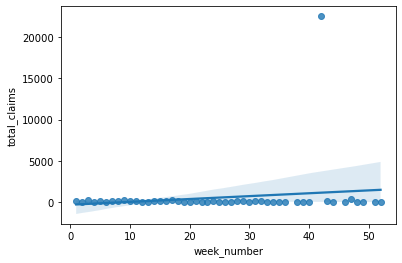

In [5]:
sns.regplot(df['week_number'], df['total_claims'])

In [6]:
X = df['week_number'].values.reshape(-1,1)
y = df['total_claims'].values.reshape(-1,1)


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.04, random_state = 0)

In [8]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm

LinearRegression()

In [9]:
#To retrieve the intercept:
print(regressor.intercept_)

#For retrieving the slope:
print(regressor.coef_)

[-321.85294759]
[[35.741227]]


In [10]:
y_pred = regressor.predict(X_test)

In [11]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,43.0,750.383862
1,198.0,-143.146813


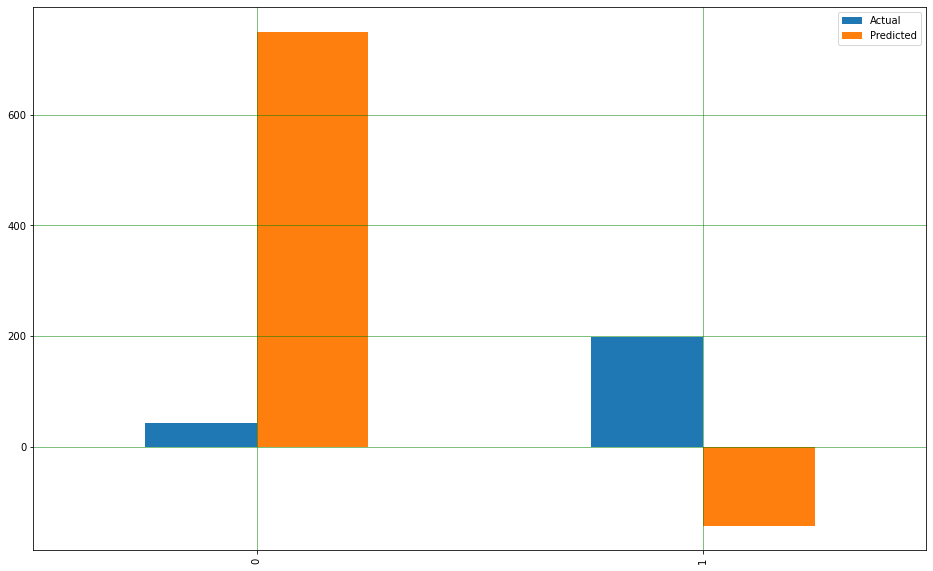

In [12]:
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [13]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 524.2653374901895
Mean Squared Error: 308386.5382543503
Root Mean Squared Error: 555.325614621143


In [14]:
#linear regression just to see how bad it is, looks kinda linear bar Purdue??
def regression(data, yvar, xvars):
    result = sm.OLS(data[yvar], data[xvars]).fit()
    return result.predict(44)

In [15]:
data

,uu_id,timeperiod,week_number,countyfips,tract,tract_name,total_claims,edu_8th_or_less,edu_grades_9_11,edu_hs_grad_equiv,...,gender_female,gender_male,gender_na,race_amerindian,race_asian,race_black,race_noanswer,race_hawaiiannative,race_other,race_white
59040,9bee42b55f891413ae7fac2d9d89280a,20210306.0,10.0,18003.0,100.0,"Census Tract 1, Allen County, Indiana",0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59064,9bee42b55f891413ae7fac2d9d89280a,20210529.0,22.0,18003.0,100.0,"Census Tract 1, Allen County, Indiana",0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59123,3952d1e916f8cad4225e4b9e29f62a06,20210306.0,10.0,18039.0,100.0,"Census Tract 1, Elkhart County, Indiana",0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59147,3952d1e916f8cad4225e4b9e29f62a06,20210529.0,22.0,18039.0,100.0,"Census Tract 1, Elkhart County, Indiana",0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59178,3952d1e916f8cad4225e4b9e29f62a06,20211016.0,42.0,18039.0,100.0,"Census Tract 1, Elkhart County, Indiana",15.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184317,20f6ad2e745b760f4d67491c4c9f2881,20210807.0,32.0,18127.0,990000.0,"Census Tract 9900, Porter County, Indiana",0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
184318,20f6ad2e745b760f4d67491c4c9f2881,20210814.0,33.0,18127.0,990000.0,"Census Tract 9900, Porter County, Indiana",0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
184319,20f6ad2e745b760f4d67491c4c9f2881,20210821.0,34.0,18127.0,990000.0,"Census Tract 9900, Porter County, Indiana",0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
184320,20f6ad2e745b760f4d67491c4c9f2881,20210828.0,35.0,18127.0,990000.0,"Census Tract 9900, Porter County, Indiana",0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
def printexcel(result, filename):
    frame = pd.DataFrame(list(result.items()), columns=['uu_id','total_claims'])
    frame['total_claims'] =  frame['total_claims'].apply(lambda x: str(x).replace('[','').replace(']',''))
    frame['total_claims'] = frame['total_claims'].astype(float)
    frame.to_csv(filename, index=False)

In [17]:
#r squared value average for all the models, not bad tbh
def regressionsquare(data, yvar, xvars):
    X_train, X_test, y_train, y_test = train_test_split(data[xvars], data[yvar], train_size=0.98, random_state=42)
    result = sm.OLS(y_train, X_train).fit()
    return result.rsquared
result = data.groupby('uu_id').apply(regressionsquare, 'total_claims', 'week_number')
print(result.mean())

0.7690933770911994


In [18]:
result_dict1 = data.groupby('uu_id').apply(regression, 'total_claims', 'week_number').to_dict()
printexcel(result_dict1, 'model1.csv')

In [19]:
from sklearn.linear_model import LinearRegression
def regressionsquare(data, yvar, xvars): 
    lm = LinearRegression()
    X = data[xvars].values.reshape(-1, 1)
    y = data[yvar].values.reshape(-1, 1)
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.98, random_state=42)
    lm.fit(X_train, y_train)
    y_predicted = lm.predict(X_test)
    #print(metrics.mean_absolute_error(y_test, y_predicted))
result = data.groupby('uu_id').apply(regressionsquare, 'total_claims', 'week_number').to_dict()
printexcel(result_dict1, 'model2.csv')